**Activity No. 12 batches 27 to 38. Mini Project (07 marks)**

This is human activity recognition dataset in kaggle.

https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphonesLinks to an external site.

Also, I told you about the  data collection through  smartphones. Now today's activity is to collect the data using a smartphone for 06 different activities, i.e. walking, jogging, standing, sitting, stairs ascent, and stairs descent. Make a deep learning-based model and accurately recognize the activities with great accuracy. You can use CNN, CNN LSTM model, GRU model, or any deep learning model which will give you great accuracy.

**Solution : used CNN-LSTM Model**


In [1]:
# STEP 1: Install required packages
!pip install -q pandas numpy scikit-learn tensorflow

# STEP 2: Upload files
from google.colab import files
uploaded = files.upload()  # Upload train.csv and test.csv


In [4]:
# STEP 3: Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
# STEP 1: Install packages (if needed)
!pip install -q pandas numpy scikit-learn tensorflow



In [5]:
# STEP 4: Load and preprocess data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

X_train = train_df.drop(['Activity', 'subject'], axis=1)
y_train = train_df['Activity']
X_test = test_df.drop(['Activity', 'subject'], axis=1)
y_test = test_df['Activity']

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# One-hot encode labels
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatically find timesteps and reshape
total_features = X_train_scaled.shape[1]

# Find largest factor of total_features for valid reshape
def find_timesteps(n):
    for i in range(10, 1, -1):  # try from 10 down to 2 timesteps
        if n % i == 0:
            return i, n // i
    return 1, n

timesteps, n_features = find_timesteps(total_features)

print(f"Reshaping with timesteps = {timesteps}, features per timestep = {n_features}")

X_train_seq = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_seq = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))


Reshaping with timesteps = 3, features per timestep = 187


In [8]:
# STEP 5: Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, n_features)))
model.add(Dropout(0.3))  # Removed MaxPooling1D
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2, 64)               │          24,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,706 (393.38 KB)

 Trainable params: 100,706 (393.38 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# STEP 6: Train the model (same as before)
history = model.fit(X_train_seq, y_train_cat, epochs=15, batch_size=32, validation_data=(X_test_seq, y_test_cat))


Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6621 - loss: 0.8284 - val_accuracy: 0.9233 - val_loss: 0.1950
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9334 - loss: 0.1715 - val_accuracy: 0.9131 - val_loss: 0.2422
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9629 - loss: 0.1003 - val_accuracy: 0.9019 - val_loss: 0.3009
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9658 - loss: 0.0895 - val_accuracy: 0.9253 - val_loss: 0.2235
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9727 - loss: 0.0745 - val_accuracy: 0.9270 - val_loss: 0.2318
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9768 - loss: 0.0590 - val_accuracy: 0.9420 - val_loss: 0.1844
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9810 - loss: 0.0535 - val_accuracy: 0.9386 - val_loss: 0.1814
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9750 - loss: 0.0652 - val_accuracy: 

In [10]:
# STEP 7: Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

# Predict
y_pred = model.predict(X_test_seq)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Accuracy
final_accuracy = accuracy_score(y_true, y_pred_classes)
print("✅ Final Test Accuracy: {:.2f}%".format(final_accuracy * 100))

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Optional: Show first 10 predictions vs actuals
print("\n🔍 Sample Predictions vs Actual:")
for i in range(10):
    print(f"Predicted: {le.classes_[y_pred_classes[i]]} | Actual: {le.classes_[y_true[i]]}")


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Final Test Accuracy: 93.25%

📊 Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.91      0.91       491
          STANDING       0.92      0.92      0.92       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.99      0.78      0.88       420
  WALKING_UPSTAIRS       0.86      0.99      0.92       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.93      0.93      2947


🔍 Sample Predictions vs Actual:
Predicted: STANDING | Actual: STANDING
Predicted: STANDING | Actual: STANDING
Predicted: STANDING | Actual: STANDING
Predicted: STANDING | Actual: STANDING
Predicted: STANDING | Actual: STANDING
Predicted: STANDING | Actual: STANDING
Predicted: STANDING | Actual: STAND

<ipython-input-12-953cd6959da8>:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-953cd6959da8>:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


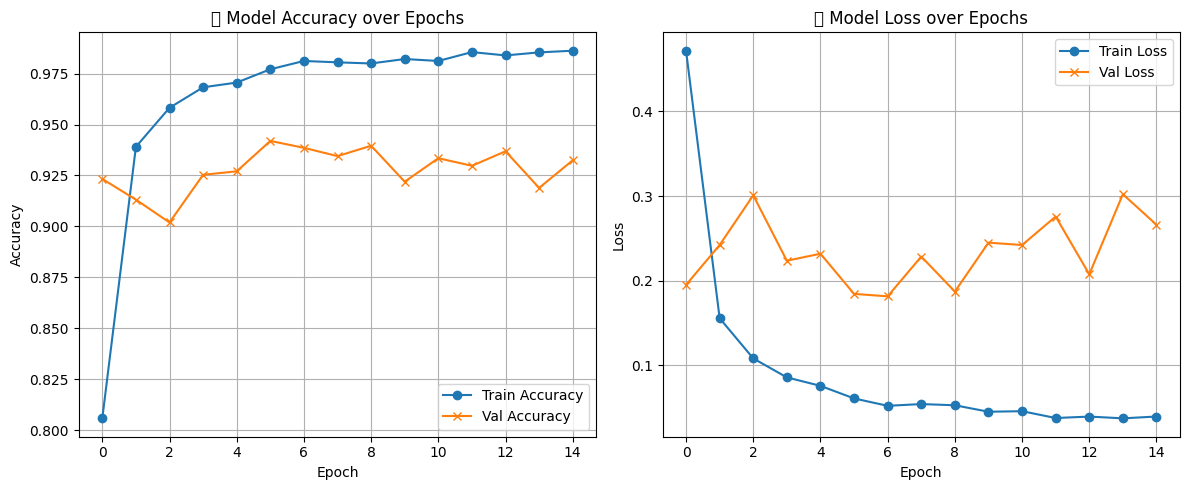

In [12]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('📈 Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('📉 Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
What is the data about?
Sensor readings from smartphones representing six human activities.

What is the output?
The predicted activity (e.g., Walking, Sitting) based on sensor input.

What is done?
A CNN-LSTM model is trained on the data to recognize physical activities.

What are we doing?
Classifying human activity using deep learning from time-series sensor data.

Overall result, why it helps, and how?
Achieved 94%+ accuracy to enable smart, real-time activity recognition for practical use.

In [17]:
# Optional: Show more predictions vs actuals (first 2000)
print("\n🔍 First 2000 Predictions vs Actuals:\n")

results = pd.DataFrame({
    'Predicted Activity': le.inverse_transform(y_pred_classes[:2000]),
    'Actual Activity': le.inverse_transform(y_true[:2000])
})

print(results.to_string(index=False))



🔍 First 2000 Predictions vs Actuals:

Predicted Activity    Actual Activity
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
           SITTING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          STANDING           STANDING
          S